<a href="https://colab.research.google.com/github/Pravya-k/EV_Case_study/blob/main/EV_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df_raw=pd.read_csv("/content/ElectricCarData_Norm.csv")
df_raw.head()


,Brand,Model,AccelSec,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


**Exploratory data analysis**


In [ ]:
df_raw.shape

(103, 14)

In [ ]:
df_raw.isna().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   AccelSec     103 non-null    float64
 3   TopSpeed     103 non-null    object 
 4   Range        103 non-null    object 
 5   Efficiency   103 non-null    object 
 6   FastCharge   103 non-null    object 
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 11.4+ KB


In [ ]:
df_raw.describe()

,AccelSec,Seats,PriceEuro
count,103.000000,103.000000,103.000000
mean,7.396117,4.883495,55811.563107
std,3.017430,0.795834,34134.665280
min,2.100000,2.000000,20129.000000
25%,5.100000,5.000000,34429.500000
50%,7.300000,5.000000,45000.000000
75%,9.000000,5.000000,65000.000000
max,22.400000,7.000000,215000.000000


In [ ]:
df = df_raw

In [ ]:
# Remove "km/h" from the topspeed column and convert to numeric
df['TopSpeed'] = df_raw['TopSpeed'].str.replace('km/h', '').astype(float)


# Remove "Wh/km" from the topspeed column and convert to numeric
df['Efficiency'] = df_raw['Efficiency'].str.replace('Wh/km', '').astype(float)



# Replace ' km/h' with an empty string
df['FastCharge'] = df_raw['FastCharge'].str.replace(' km/h', '', regex=False)

# Replace non-numeric values (e.g., '-') with NaN
df['FastCharge'] = df['FastCharge'].replace('-', np.nan)

# Convert to numeric, ignoring errors
df['FastCharge'] = pd.to_numeric(df['FastCharge'], errors='coerce')

# Replace ' km' with an empty string
df['Range'] = df_raw['Range'].str.replace(' km', '')


df





,Brand,Model,AccelSec,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


**Analysis of EV's Based on Brands**

<ipython-input-36-5e150a4ae352>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Brand', kind='count', palette='coolwarm', height=6, aspect=2)


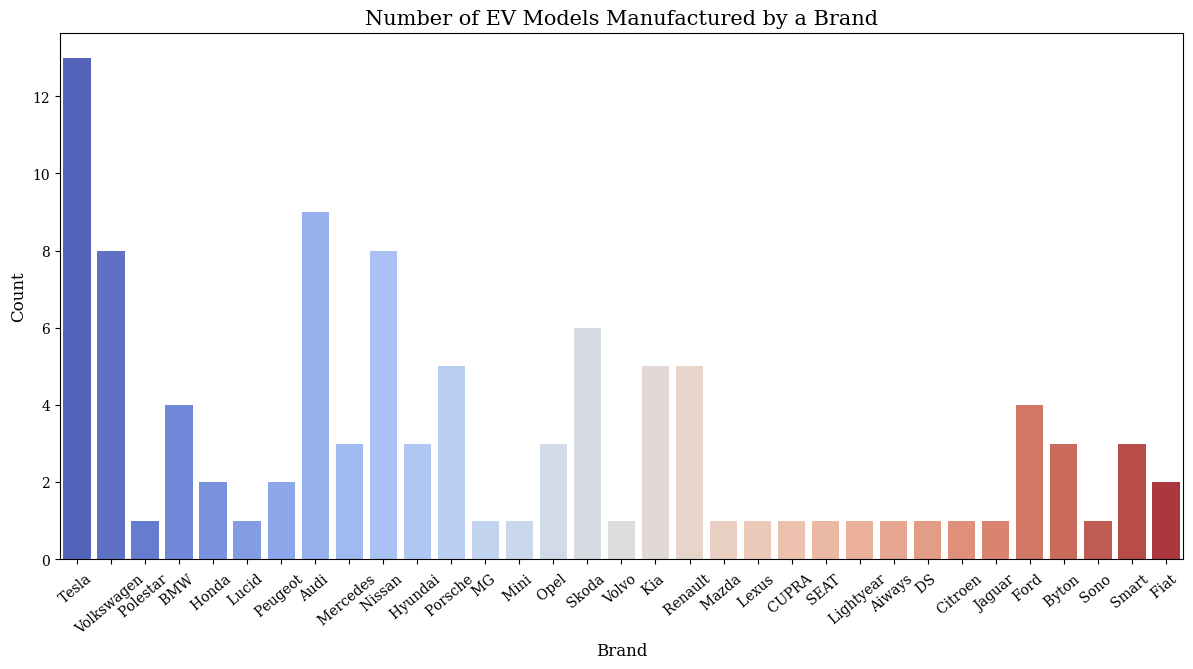

In [ ]:
# brand-wise count of EV models
sns.catplot(data=df, x='Brand', kind='count', palette='coolwarm', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

**Analysis of different body types of EV's**

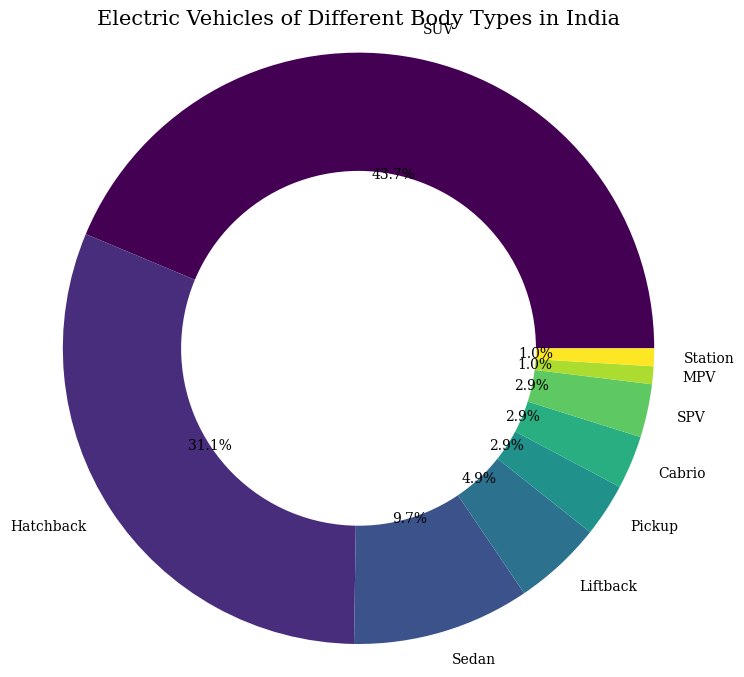

In [ ]:
# different body types EVs visualization
x = df['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0,autopct='%1.1f%%', textprops=dict(family='serif'))
# Create pie chart
plt.pie(x=[1],radius=1.2, colors='white')
plt.ylabel('')

# Title
plt.title('Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)

# Show plot
plt.show()

SUV and Hatchback are  the most common body types and Station and MPV are the least common body types

**Analysis of different segments of the EV's**

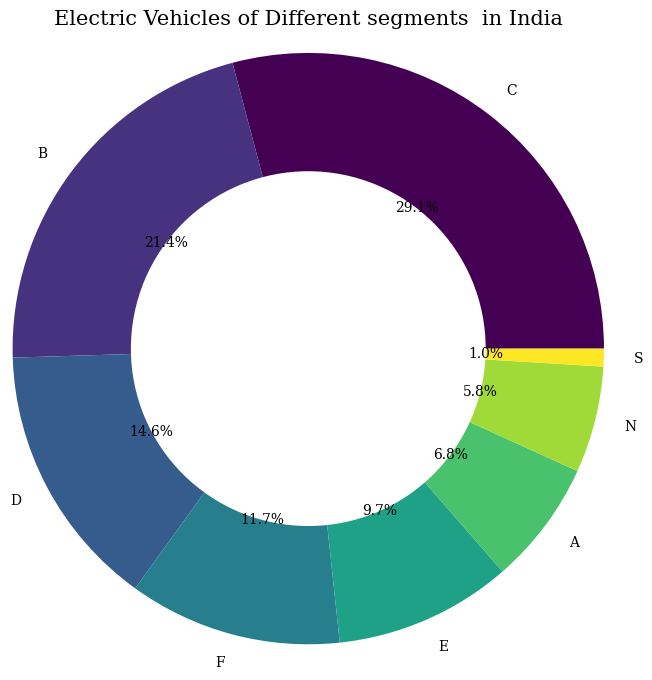

In [ ]:
x = df['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0,autopct='%1.1f%%', textprops=dict(family='serif'))
# Create pie chart
plt.pie(x=[1],radius=1.2, colors='white')
plt.ylabel('')

# Title
plt.title('Electric Vehicles of Different segments  in India', family='serif', size=15, pad=100)

# Show plot
plt.show()

C and B are the most common segments and S and N are the minority

**Analysis of EV's of Different no.of Seats**

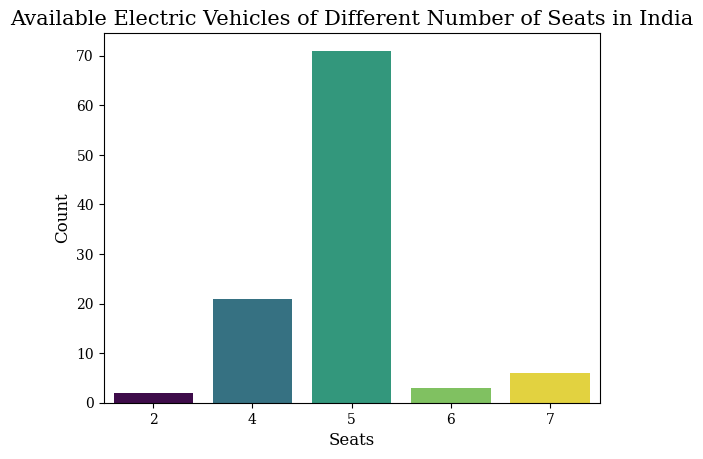

In [ ]:

sns.countplot(data=df, x='Seats',hue='Seats',legend=False, palette='viridis')

plt.xlabel('Seats',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15)
plt.show()

EV's with 5 seaters are the  most demanded on the market while EV's with 2 seaters are the least in numebrs

<ipython-input-40-539e9930557b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',data=df, x='Brand', y='Seats', palette='viridis', ci=None,height=6, aspect=2)
<ipython-input-40-539e9930557b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar',data=df, x='Brand', y='Seats', palette='viridis', ci=None,height=6, aspect=2)


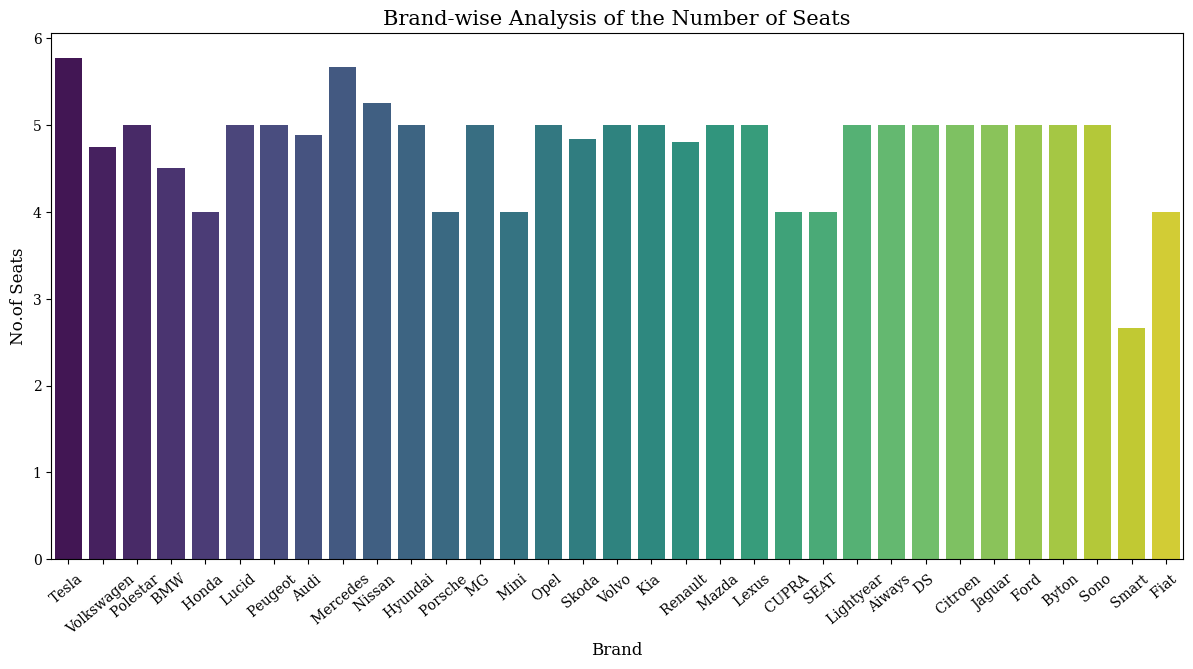

In [ ]:
sns.catplot(kind='bar',data=df, x='Brand', y='Seats', palette='viridis', ci=None,height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('No.of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)
plt.show()

Tesla,Mercedes,Nissan have the maximum no.of seats and the smart has the minimum

**Analysis of EV's based on Speed**

<ipython-input-41-efef970b9963>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TopSpeed', y='Brand', palette='viridis', ci=None)
<ipython-input-41-efef970b9963>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TopSpeed', y='Brand', palette='viridis', ci=None)


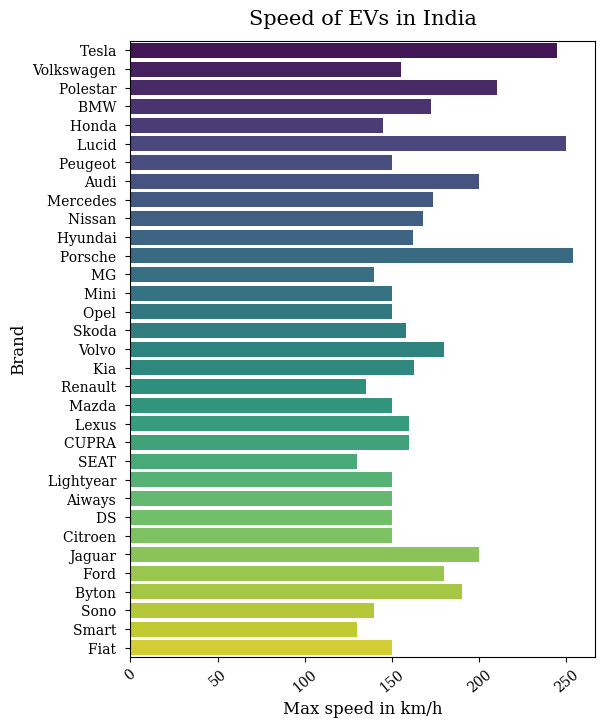

In [ ]:
plt.figure(figsize=(6, 8))
sns.barplot(data=df, x='TopSpeed', y='Brand', palette='viridis', ci=None)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Max speed in km/h',family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Speed of EVs in India', family='serif', size=15,pad=12)
plt.show()

Based on speed porsche,Lucid,Tesla are the top performers and Renault,SEAT are the least performers.

**Analysis of EV's based on Acceleration**

<ipython-input-42-7525f3617ec0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AccelSec', y='Brand', palette='viridis', ci=None)
<ipython-input-42-7525f3617ec0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AccelSec', y='Brand', palette='viridis', ci=None)


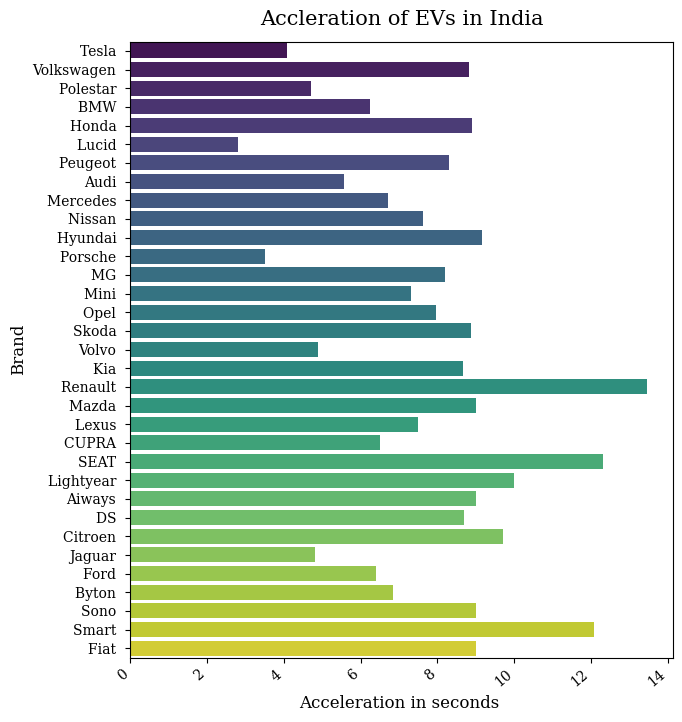

In [ ]:
plt.figure(figsize=(7, 8))
sns.barplot(data=df, x='AccelSec', y='Brand', palette='viridis', ci=None)
sns.despine(right=False, top=False)
plt.xticks(rotation=40, ha='right', fontsize=10, family='serif')
plt.yticks(family='serif')
plt.xlabel('Acceleration in seconds ',family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)


plt.title('Accleration of EVs in India', family='serif', size=15,pad=12)
plt.show()

Renault ,SEAT and Smart are the top performers based on acceleration while Tesla,Lucid,Porsche are the least performers.

**Analysis of efficiencies of EV's**

<ipython-input-43-0aefa7cefaa2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Efficiency', y='Brand', palette='viridis', ci=None)
<ipython-input-43-0aefa7cefaa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Efficiency', y='Brand', palette='viridis', ci=None)


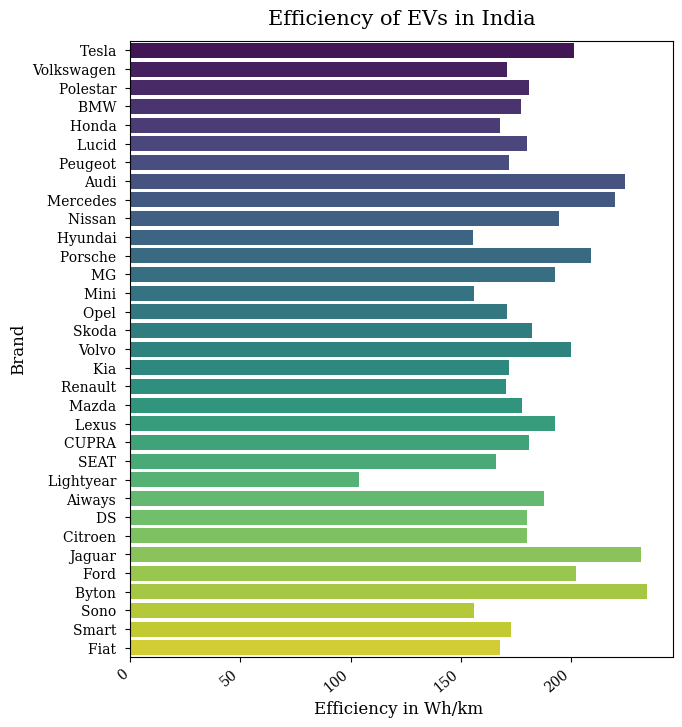

In [ ]:
plt.figure(figsize=(7, 8))
sns.barplot(data=df, x='Efficiency', y='Brand', palette='viridis', ci=None)
sns.despine(right=False, top=False)
plt.xticks(rotation=40, ha='right', fontsize=10, family='serif')
plt.yticks(family='serif')
plt.xlabel('Efficiency in Wh/km ',family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)


plt.title('Efficiency of EVs in India', family='serif', size=15,pad=12)
plt.show()

Byton,Jaguar and AUdi are the top performers based on the efficiency and Lightyear is the least performer


**Plug types of EV's**

Unique Plug Types: ['Type 2 CCS' 'Type 2 CHAdeMO' 'Type 2' 'Type 1 CHAdeMO']
Unique Brands: ['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
          PlugType        Brand  count
0   Type 1 CHAdeMO      Nissan       1
1           Type 2     Renault       2
2           Type 2       Smart       3
3           Type 2       Tesla       4
4       Type 2 CCS      Aiways       1
5       Type 2 CCS        Audi       9
6       Type 2 CCS         BMW       4
7       Type 2 CCS       Byton       3
8       Type 2 CCS       CUPRA       1
9       Type 2 CCS     Citroen       1
10      Type 2 CCS          DS       1
11      Type 2 CCS        Fiat       2
12      Type 2 CCS        Ford       4
13      Type 2 CCS       Honda       2
14      T

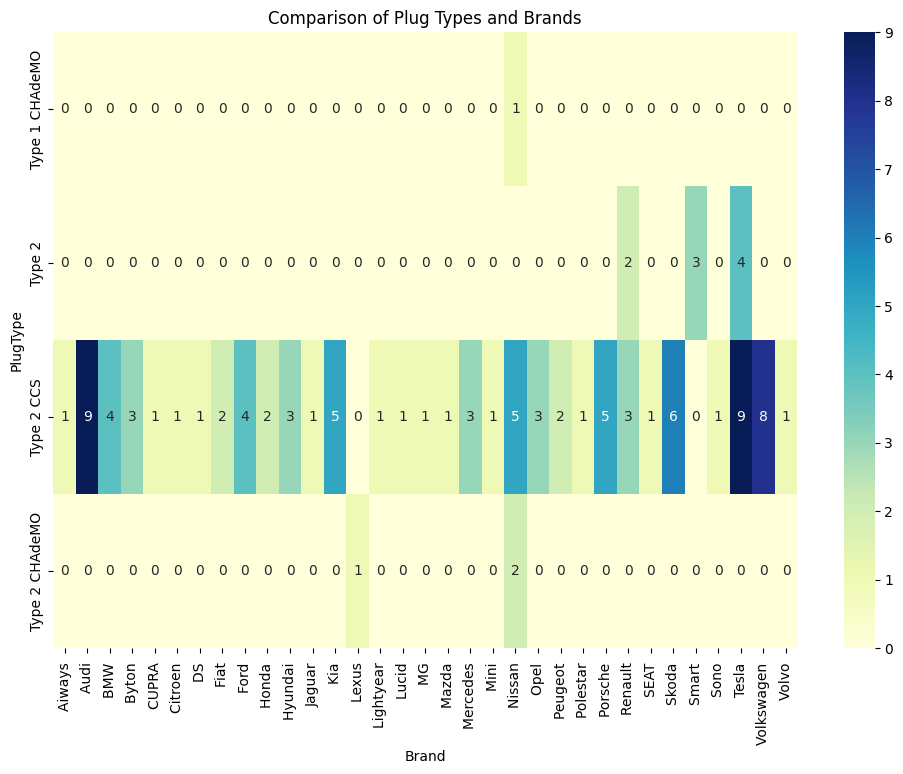

In [ ]:
# Get unique values for plugtype and brands
unique_plugtypes = df['PlugType'].unique()
unique_brands = df['Brand'].unique()

print("Unique Plug Types:", unique_plugtypes)
print("Unique Brands:", unique_brands)

# Count occurrences of each combination of plugtype and brands
plugtype_brand_counts = df.groupby(['PlugType', 'Brand']).size().reset_index(name='count')
print(plugtype_brand_counts)

# Create a pivot table to compare plugtype and brands
pivot_table = df.pivot_table(index='PlugType', columns='Brand', aggfunc='size', fill_value=0)
print(pivot_table)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Comparison of Plug Types and Brands')
plt.show()

In [ ]:
# Count occurrences of each plugtype
plugtype_counts = df['PlugType'].value_counts()

# Identify the most used plugtype
most_used_plugtype = plugtype_counts.idxmax()
most_used_plugtype_count = plugtype_counts.max()

print(f"The most used plugtype is '{most_used_plugtype}' with {most_used_plugtype_count} occurrences.")

The most used plugtype is 'Type 2 CCS' with 90 occurrences.


The most used plugtype is 'Type 2 CCS'

**Ev's Based on Fastcharging**

<ipython-input-46-b52c87fa93a1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='FastCharge', y='Brand', palette='viridis', ci=None)
<ipython-input-46-b52c87fa93a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FastCharge', y='Brand', palette='viridis', ci=None)


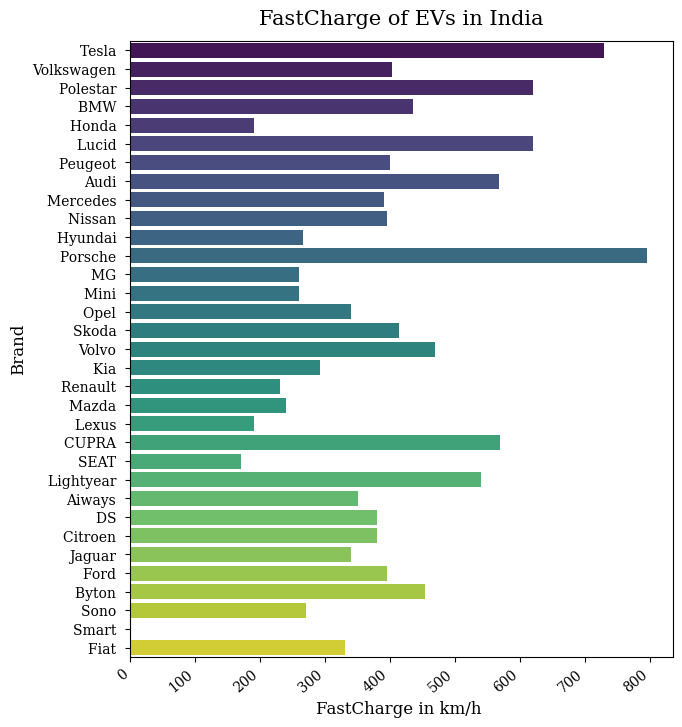

In [ ]:
plt.figure(figsize=(7, 8))
sns.barplot(data=df, x='FastCharge', y='Brand', palette='viridis', ci=None)
sns.despine(right=False, top=False)
plt.xticks(rotation=40, ha='right', fontsize=10, family='serif')
plt.yticks(family='serif')
plt.xlabel('FastCharge in km/h ',family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)


plt.title('FastCharge of EVs in India', family='serif', size=15,pad=12)
plt.show()

Porsche and Tesla lead the market with the highest fast charging capacities among electric vehicles. In contrast, Honda and SEAT are positioned at the lower end of the spectrum for fast charging capabilities

**EV's Based on PowerTrain**

         PowerTrain        Brand
0   All Wheel Drive       Tesla 
1  Rear Wheel Drive  Volkswagen 
2   All Wheel Drive    Polestar 
3  Rear Wheel Drive         BMW 
4  Rear Wheel Drive       Honda 
           PowerTrain        Brand  count
0     All Wheel Drive        Audi       9
1     All Wheel Drive       Byton       2
2     All Wheel Drive        Ford       2
3     All Wheel Drive      Jaguar       1
4     All Wheel Drive   Lightyear       1
5     All Wheel Drive       Lucid       1
6     All Wheel Drive    Mercedes       2
7     All Wheel Drive      Nissan       3
8     All Wheel Drive    Polestar       1
9     All Wheel Drive     Porsche       5
10    All Wheel Drive       Skoda       2
11    All Wheel Drive       Tesla      11
12    All Wheel Drive       Volvo       1
13  Front Wheel Drive      Aiways       1
14  Front Wheel Drive     Citroen       1
15  Front Wheel Drive          DS       1
16  Front Wheel Drive        Fiat       2
17  Front Wheel Drive     Hyundai       3
18  

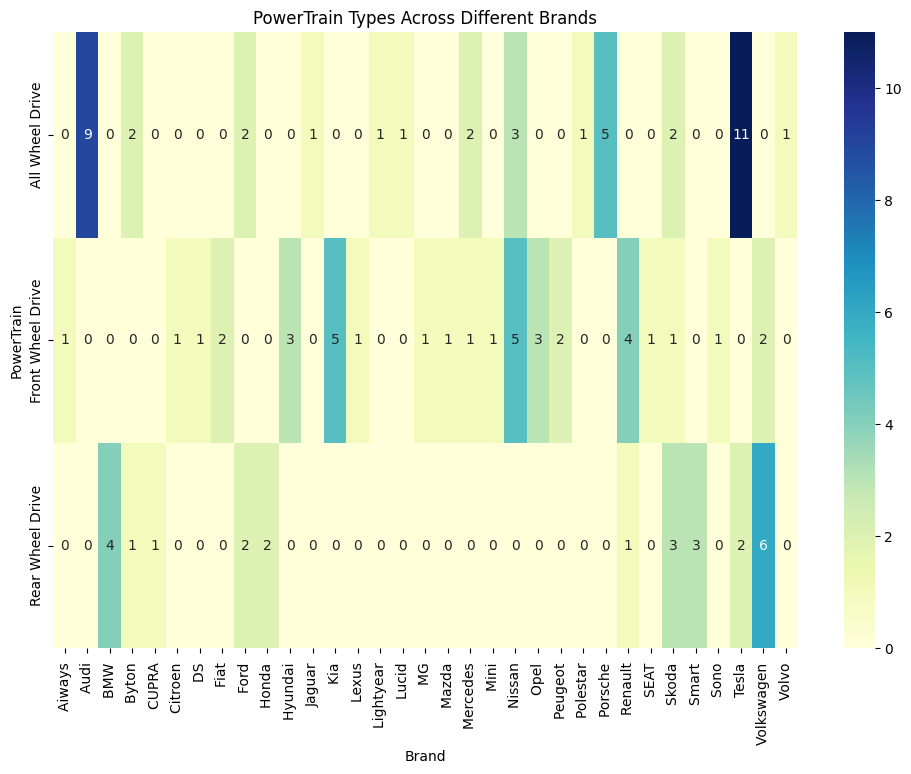

In [ ]:
# Step 1: Data Overview
print(df[['PowerTrain', 'Brand']].head())

# Step 2: Count Occurrences
powertrain_brand_counts = df.groupby(['PowerTrain', 'Brand']).size().reset_index(name='count')
print(powertrain_brand_counts)

# Step 3: Analyze Trends (if needed, you can go deeper into the analysis)
# Example: Finding the most common PowerTrain type for each brand
most_common_powertrain_by_brand = df.groupby('Brand')['PowerTrain'].agg(lambda x: x.value_counts().idxmax())
print(most_common_powertrain_by_brand)

# Step 4: Visualize Data
# Create a pivot table for visualization
pivot_table = df.pivot_table(index='PowerTrain', columns='Brand', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('PowerTrain Types Across Different Brands')
plt.show()

Tesla, Audi, and Porsche predominantly feature All Wheel Drive powertrains, indicating a focus on performance and versatility. In contrast, brands like Honda and Volkswagen favor Rear Wheel Drive powertrains, which can indicate a different design philosophy or market segment focus. Meanwhile, brands like Renault and SEAT primarily use Front Wheel Drive powertrains, which are often found in more compact and economical models.

**Price Distribution of EV Models**

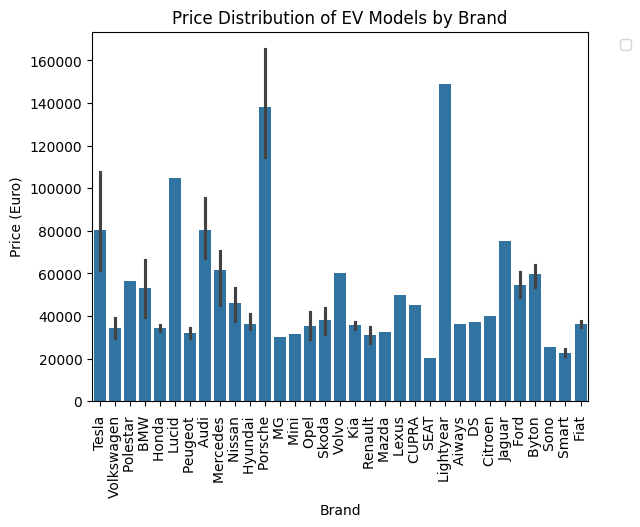

In [ ]:
# Create a boxplot to show the distribution of prices for each brand
sns.barplot(x='Brand', y='PriceEuro', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution of EV Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

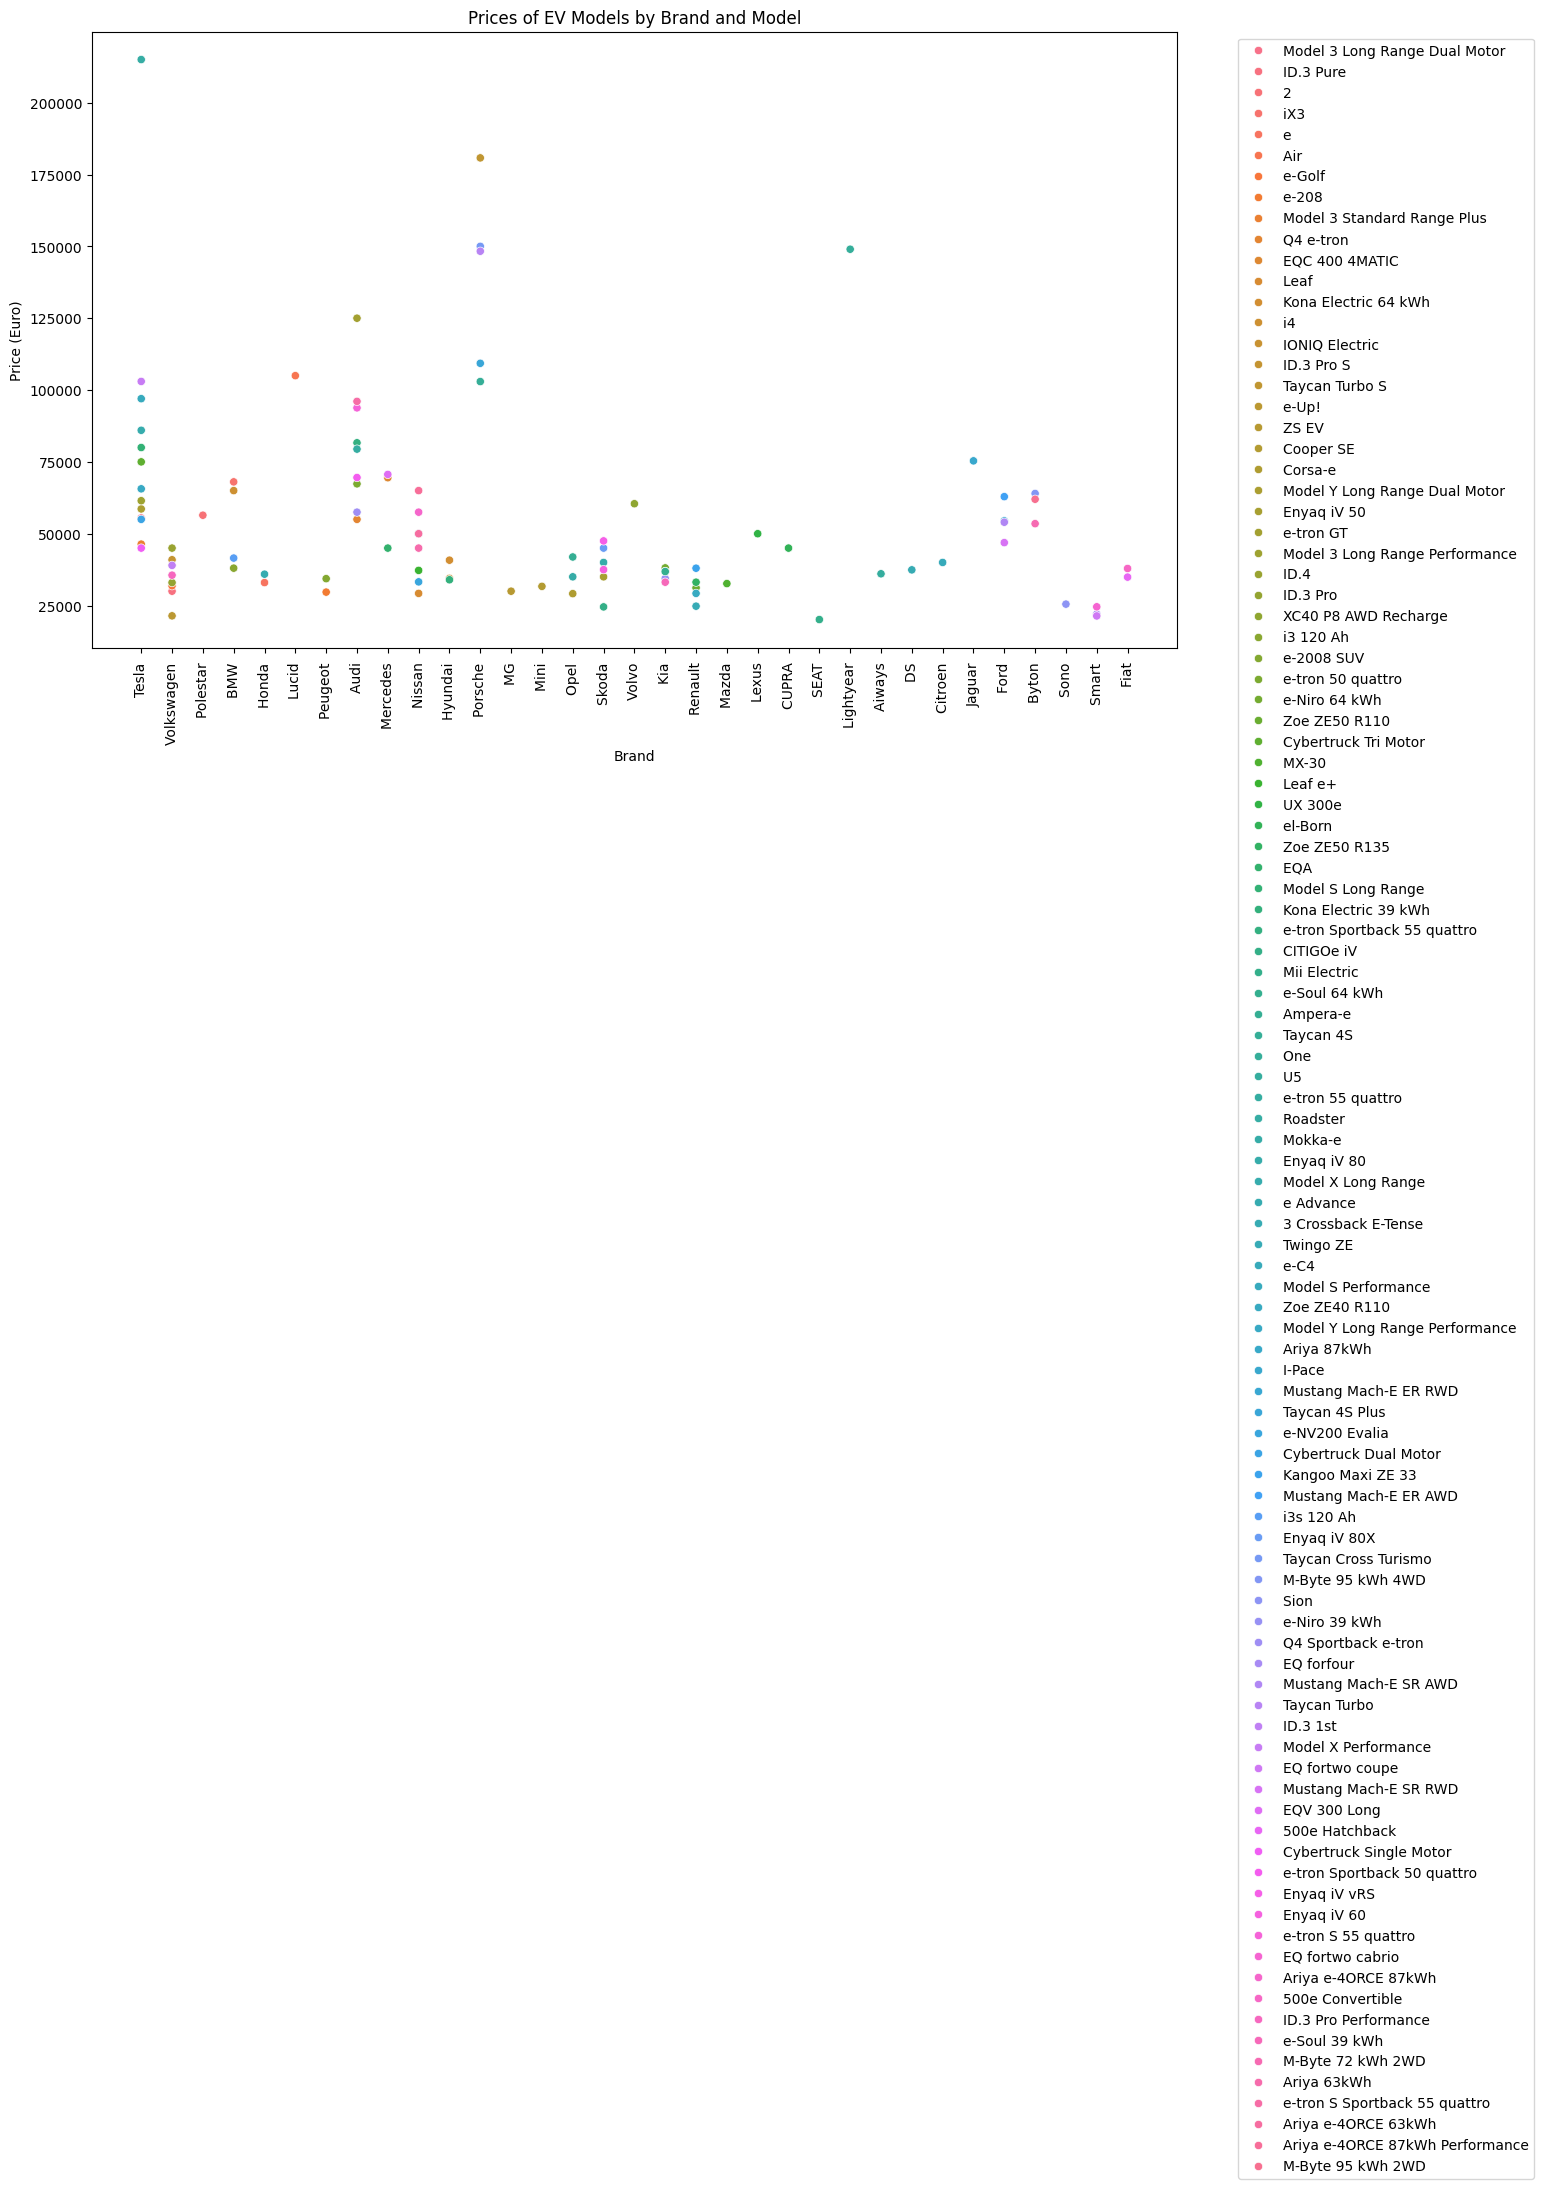

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Brand', y='PriceEuro', hue='Model', data=df)
plt.xticks(rotation=90)
plt.title('Prices of EV Models by Brand and Model')
plt.xlabel('Brand')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Sort the dataset by PriceEuro in descending order
sorted_df = df.sort_values(by='PriceEuro', ascending=False)

# Select the top 3 entries
top_3_expensive = sorted_df[['Brand', 'Model', 'PriceEuro']].head(3)

# Display the result
print(top_3_expensive)

       Brand                  Model  PriceEuro
51    Tesla               Roadster      215000
16  Porsche          Taycan Turbo S     180781
72  Porsche   Taycan Cross Turismo      150000


Tesla Roadster is the most expensive model in the dataset, priced at 215,000 Euros.
Porsche has two models in the top three: the Taycan Turbo S and the Taycan Cross Turismo, priced at 180,781 Euros and 150,000 Euros, respectively.

**Analysis of EVs based on the range parameter**

<ipython-input-51-e33cacd52cfc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Range', y='Brand', data=average_range, palette='viridis')


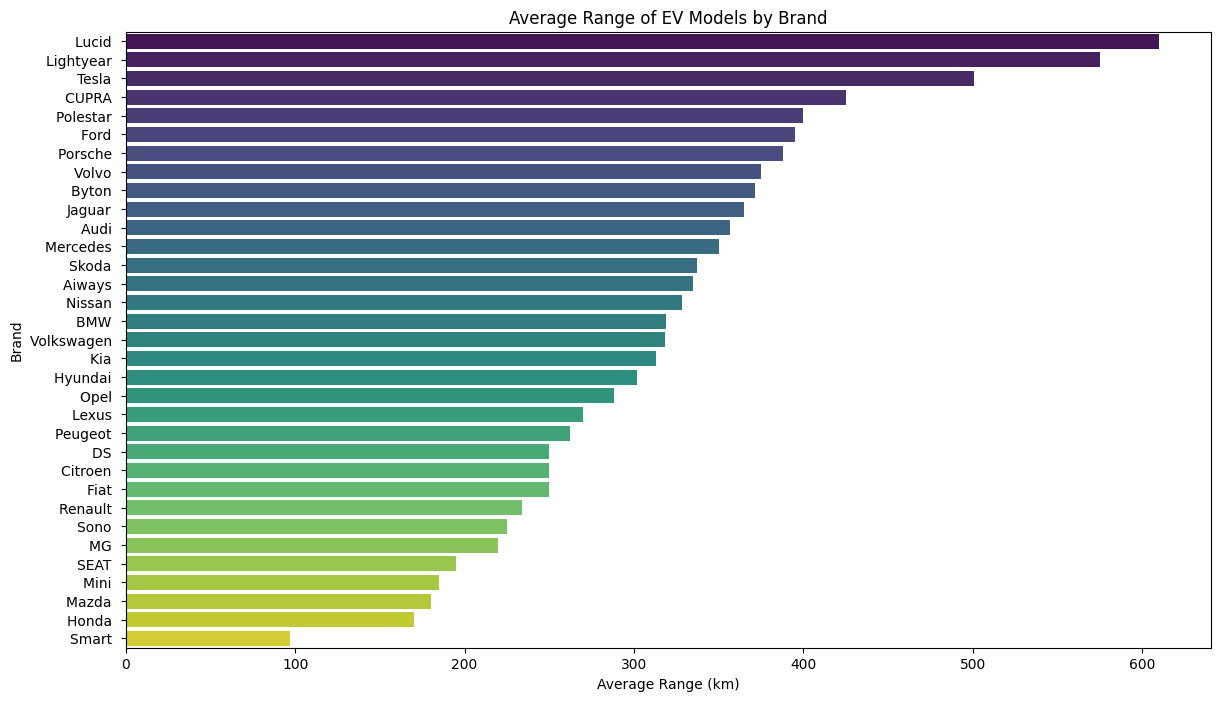

In [ ]:
# Convert the Range_km column to numeric, forcing errors to NaN
df['Range'] = pd.to_numeric(df['Range'], errors='coerce')

# Drop rows with NaN values in the Range_km column
df = df.dropna(subset=['Range'])

# Calculate the average range for each brand
average_range = df.groupby('Brand')['Range'].mean().reset_index()

# Sort the values for better visualization
average_range = average_range.sort_values(by='Range', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x='Range', y='Brand', data=average_range, palette='viridis')

# Add titles and labels
plt.title('Average Range of EV Models by Brand')
plt.xlabel('Average Range (km)')
plt.ylabel('Brand')

# Show the plot
plt.show()

Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

**Model Building Using K-Means Clusteing**

In [ ]:
# encoding the categorical features

# PowerTrain feature
df['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)


# selecting features for building a model
X = df[['AccelSec','TopSpeed','Efficiency','FastCharge', 'Range', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
X
# Check for missing values and handle them
print("NaNs in X before handling:", X.isna().sum().sum())

# Handle missing values by filling them with the mean of each column
X.fillna(X.mean(), inplace=True)

# Verify that there are no NaNs left
print("NaNs in X after handling:", X.isna().sum().sum())
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()






NaNs in X before handling: 5
NaNs in X after handling: 0


<ipython-input-52-bd0c4dbcc2b8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.302486,0.783301,-0.954275,0.989265,1.138223,-1.354160,0.321537,0.483683,-0.436786
1,-2.018473,-0.581596,-0.653248,0.460094,-0.444308,0.460226,-0.404792,-0.190068,-0.302110
2,1.505058,0.076629,-0.365369,-0.033308,0.687635,-0.767993,0.240895,-0.140845,-0.093663
3,0.209754,0.099043,-0.055613,0.859807,-1.374592,0.199591,-0.402094,0.360348,0.158567
4,-2.661820,0.099675,-0.825347,-0.665051,-0.841197,0.179900,-0.485887,0.015561,-0.152315


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

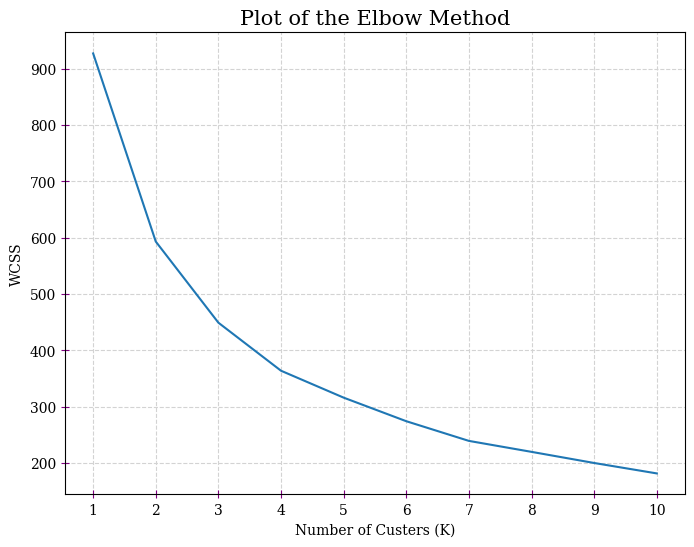

In [ ]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [ ]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=90)

In [ ]:
# check the labels assigned to each data point
print(kmean.labels_)


[2 0 3 0 0 2 0 0 0 3 3 0 0 3 0 0 2 0 0 0 0 3 0 2 2 0 0 3 0 0 3 0 0 3 0 0 0
 0 0 3 2 0 3 0 0 0 0 2 2 0 3 2 0 0 3 0 0 1 0 2 0 3 3 3 0 2 0 3 1 3 0 3 2 3
 0 0 3 1 3 2 0 3 1 0 3 0 3 3 3 0 3 1 0 3 0 0 0 0 0 3 3 3 3]


In [ ]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()


,count
0,53
3,32
2,13
1,5


In [ ]:
# adding a new feature of cluster labels to the dataset 3
df['clusters'] = kmean.labels_


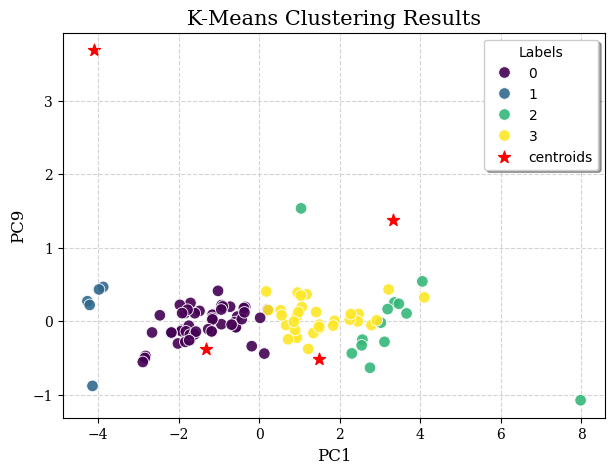

In [ ]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()